- Aprenda a buscar e questionar fontes de dados
- Limpe, processe, analise, compare informações encontradas
- Aprenda a importância de visualizações adequadas
- Crie um espírito crítico ao levantar limitações em seus estudos de dados
- Utilize o conhecimento de programação e dados na área de saúde
- Utilize dados de fontes confiáveis como Johns Hopkins e a OMS
- Entenda a dificuldade de alcançar dados estáveis durante um episódio de epidemia
- Calcule taxas de letalidade

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importar os dados

In [144]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

link desse site são atualizados todos os dias

In [5]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,864,898,920,936,957,971,994,1010,1012,1048
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,76,79,81,83,83,85,89,93,95,97
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,952,959,968,978,988,996,1004,1011,1018,1028
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19,19,21,21,22,23,23,26,26,26


In [4]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,800,800,800,802,802,803,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,108,108,117,117,117,117,118,118,118,118


In [6]:
deaths.shape

(266, 179)

In [7]:
recovered.shape

(253, 179)

In [10]:
deaths['Country/Region']

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
261    Sao Tome and Principe
262                    Yemen
263                  Comoros
264               Tajikistan
265                  Lesotho
Name: Country/Region, Length: 266, dtype: object

Aqui eh uma Serie

In [14]:
cities = deaths['Country/Region'].unique()

In [15]:
len(cities)

188

In [17]:
deaths.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
83,NaN,Congo (Brazzaville),-0.228000,15.827700,0,0,0,0,0,0,...,44,44,44,47,47,47,47,47,47,47
180,NaN,Paraguay,-23.442500,-58.443800,0,0,0,0,0,0,...,20,20,20,20,20,20,21,22,25,25
19,NaN,Bahrain,26.027500,50.550000,0,0,0,0,0,0,...,97,98,98,98,103,104,104,108,109,111
146,NaN,Latvia,56.879600,24.603200,0,0,0,0,0,0,...,30,30,30,30,30,30,30,30,31,31
189,NaN,Saint Lucia,13.909400,-60.978900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,NaN,Tanzania,-6.369028,34.888822,0,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
239,NaN,Libya,26.335100,17.228331,0,0,0,0,0,0,...,32,34,35,36,38,38,38,39,40,42
194,NaN,Serbia,44.016500,21.005900,0,0,0,0,0,0,...,311,317,330,341,352,370,382,393,405,418
201,NaN,Spain,40.463667,-3.749220,0,0,0,0,0,0,...,28385,28388,28392,28396,28401,28403,28403,28403,28406,28409
25,NaN,Bhutan,27.514200,90.433600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dados 'sujos'

In [21]:
deaths.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
7/10/20                   971
7/11/20                   994
7/12/20                  1010
7/13/20                  1012
7/14/20                  1048
Name: 0, Length: 179, dtype: object

In [30]:
deaths.set_index('Province/State')

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,864,898,920,936,957,971,994,1010,1012,1048
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,76,79,81,83,83,85,89,93,95,97
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,952,959,968,978,988,996,1004,1011,1018,1028
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,19,19,21,21,22,23,23,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,0,...,13,13,13,13,14,14,14,14,14,14
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,338,345,348,351,361,364,365,417,424,429
NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


In [31]:
deaths.set_index('Province/State').iloc[1]

Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
1/23/20                 0
                   ...   
7/10/20                85
7/11/20                89
7/12/20                93
7/13/20                95
7/14/20                97
Name: nan, Length: 178, dtype: object

* loc - localiza pela indice
* iloc - localiza pela linha

In [36]:
# valor falso pois o erro eh muito grande
# Há muito campo vazio e muito report vazio
deaths['Country/Region'].value_counts() 

China             33
Canada            14
France            11
United Kingdom    11
Australia          8
                  ..
Lesotho            1
Latvia             1
Ukraine            1
Germany            1
Costa Rica         1
Name: Country/Region, Length: 188, dtype: int64

## Agrupar por pais somar - confirmandos por país

In [62]:
confirmed_bt_country = recovered.groupby('Country/Region').sum()
confirmed_bt_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,800,800,800,802,802,803,803,803,803,803
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,108,108,117,117,117,117,118,118,118,118


In [64]:
confirmed_bt_country.loc['China'][2:]

1/22/20       28.0
1/23/20       30.0
1/24/20       36.0
1/25/20       39.0
1/26/20       49.0
            ...   
7/10/20    79802.0
7/11/20    79876.0
7/12/20    79907.0
7/13/20    79907.0
7/14/20    79967.0
Name: China, Length: 175, dtype: float64

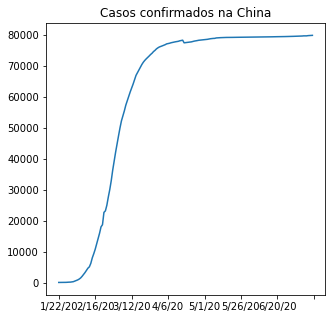

In [65]:
# Extremamente pequeno estamos sendo longe do adequado em passar uma mensagem correta.
plt.figure(figsize=(5,5))
confirmed_bt_country.loc['China'][2:].plot()
plt.title('Casos confirmados na China')
plt.show()

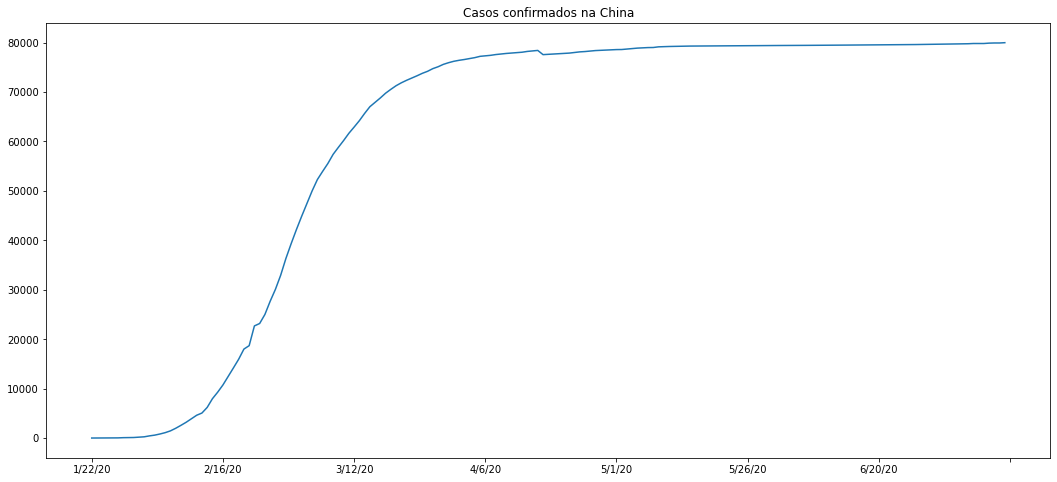

In [66]:
# Data vizualition eh fundamental ao DOIS EIXOS
plt.figure(figsize=(18,8))
confirmed_bt_country.loc['China'][2:].plot()
plt.title('Casos confirmados na China')
plt.show()

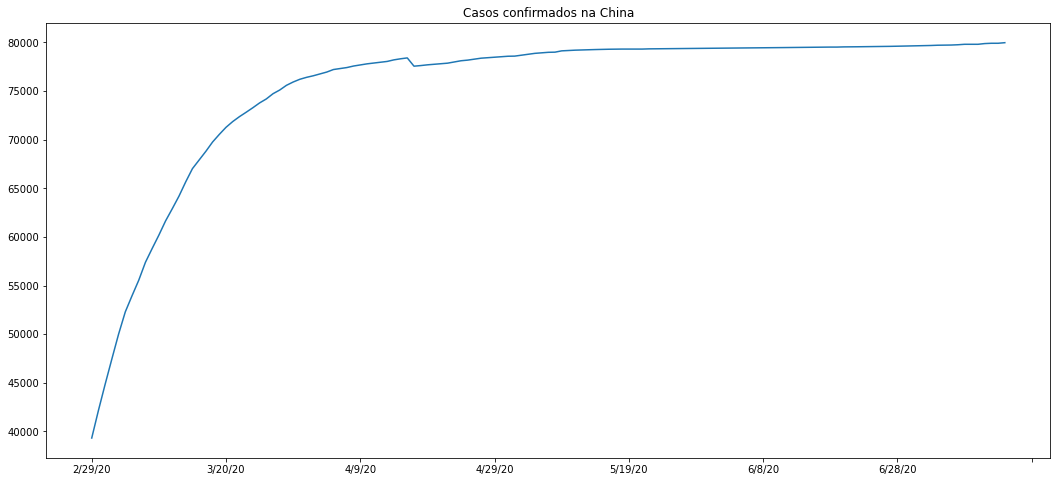

In [67]:
plt.figure(figsize=(18,8))
confirmed_bt_country.loc['China'][40:].plot()
plt.title('Casos confirmados na China')
plt.show()

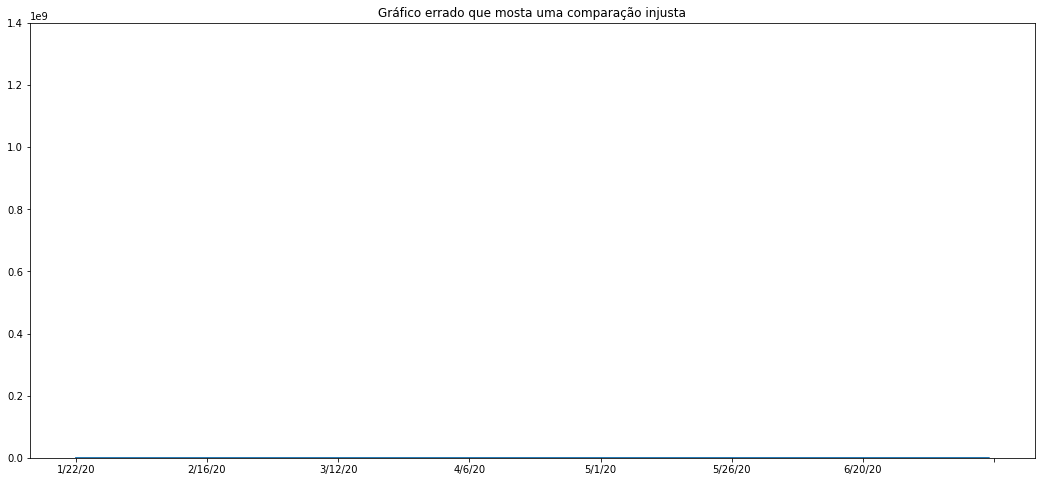

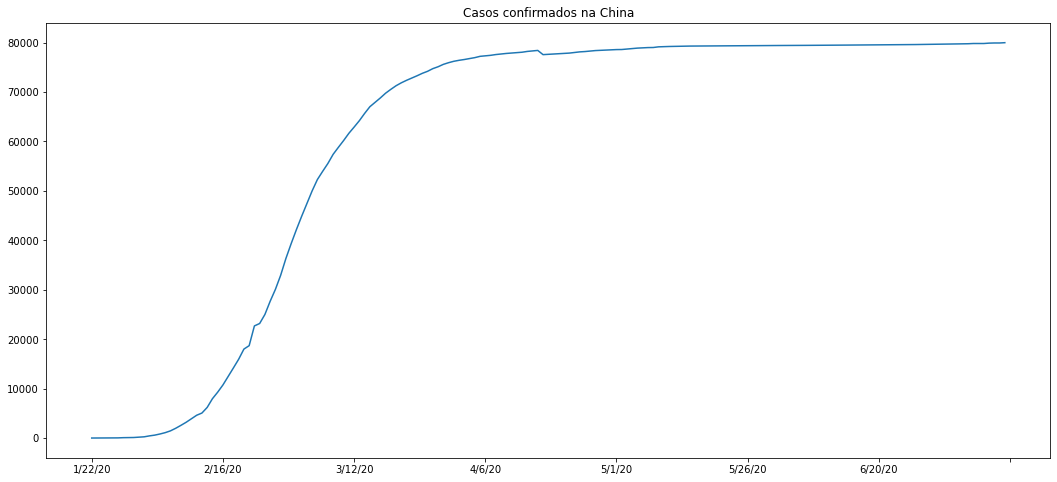

In [75]:
# exemplo ruim de manusear o eixo y
# aqui a mensagem ficou novamente diferente

"""
    Esse aqui esta tentando comparar o momento inicial com 1.4bi(população da china em 2020)
aqui a mensagem eh novamente completamente diferente e pode ser uma mensagem ruim, ate mesmo errada, poder ser uma doença
grave mas ao usarmos o eixo y com a população geral, fingimos que ela não é tão assim. Logo o primeiro gráfico não mostra
a gravidade da doença.
"""
plt.figure(figsize=(18,8))
confirmed_bt_country.loc['China'][2:].plot()
plt.title('Gráfico errado que mosta uma comparação injusta')
plt.ylim(0,1400000000) # população da china
plt.show()

plt.figure(figsize=(18,8))
confirmed_bt_country.loc['China'][2:].plot()
plt.title('Casos confirmados na China')
plt.show()

Cada gráfico mostra uma situação diferente.

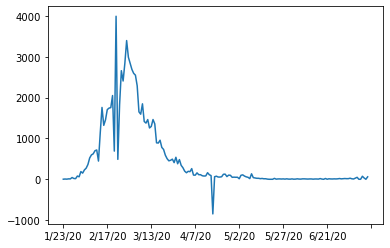

In [80]:
new_cases_china = confirmed_bt_country.loc['China'][2:].diff().dropna()
new_cases_china.plot()

Posso juntar as informações , mas não eh bom porque o eixo y tem escalas diferentes.

In [91]:
last_date = confirmed_bt_country.loc['China']
last_date.loc['7/14/20']

79967.0

Text(0.5, 1.0, 'Novos casos confirmados')

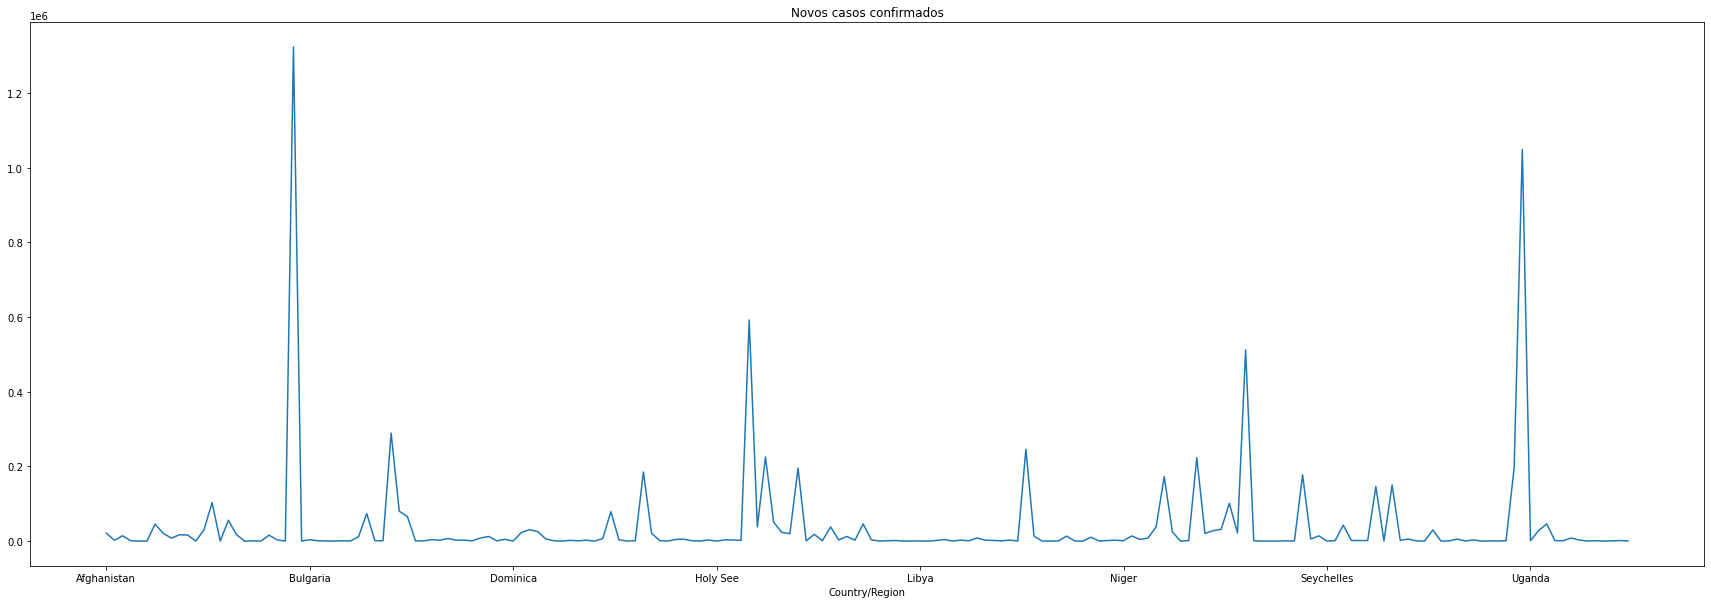

In [114]:
plt.figure(figsize=(30,10))
confirmed_bt_country['7/14/20'].plot()
plt.title('Novos casos confirmados')

Ruim de mostrar algo, pois eh uma variavel categórica

Text(0.5, 1.0, 'Novos casos confirmados')

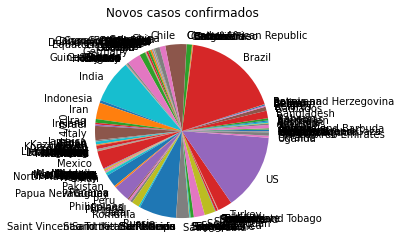

In [118]:
confirmed_bt_country['7/14/20'].plot(kind='pie')
plt.title('Novos casos confirmados')

Inviavel eh ruim tanto para poucas quanto para muitas categorias.

Text(0.5, 1.0, 'Novos casos confirmados')

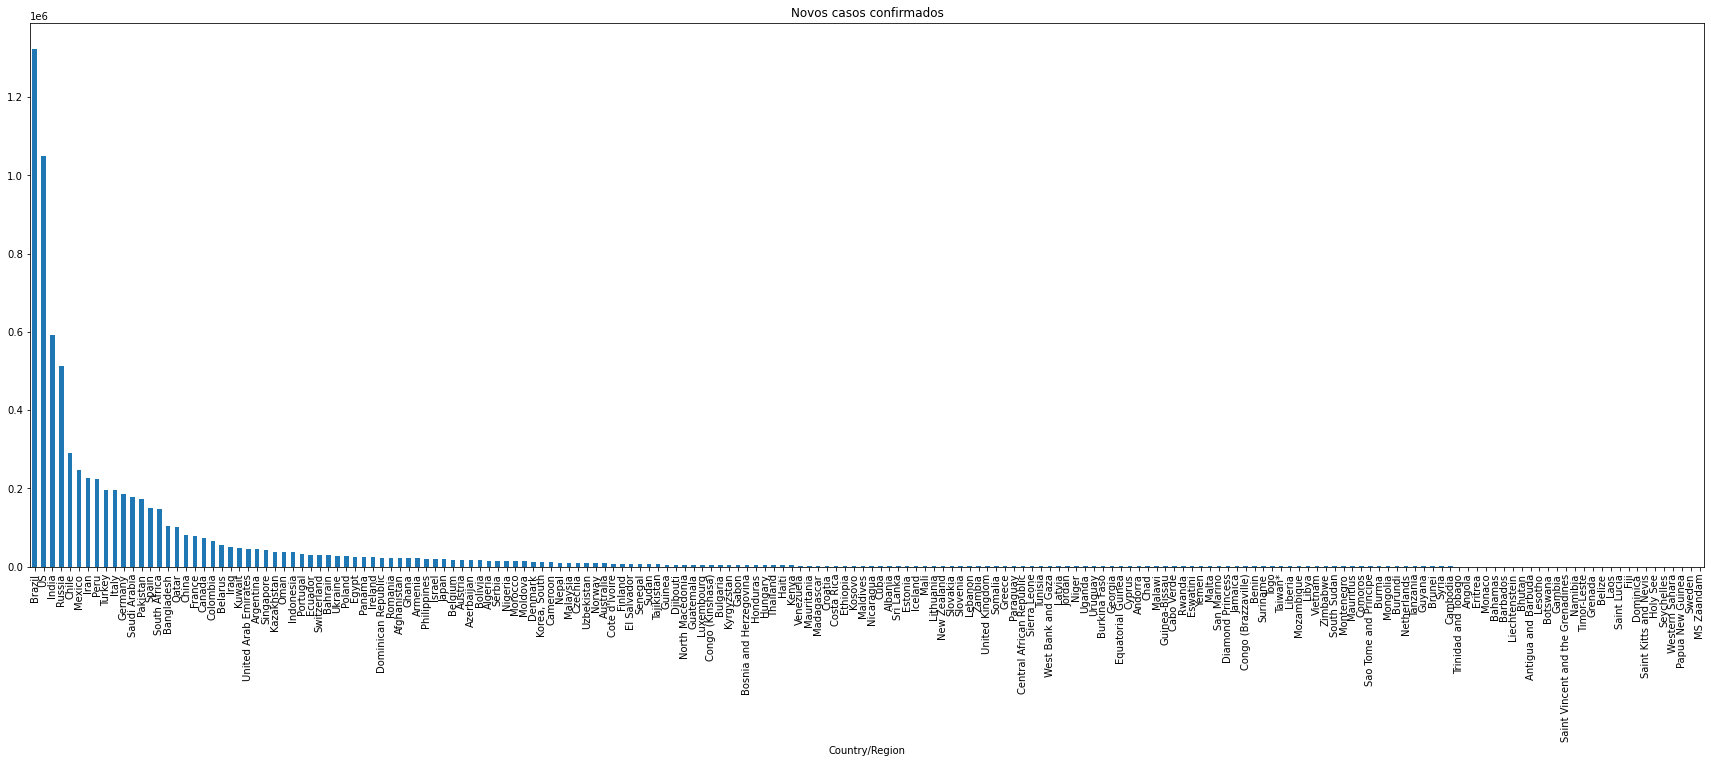

In [121]:
plt.figure(figsize=(30,10))
confirmed_bt_country['7/14/20'].sort_values(ascending=False).plot(kind='bar')
plt.title('Novos casos confirmados')

Text(0.5, 1.0, 'Novos casos confirmados')

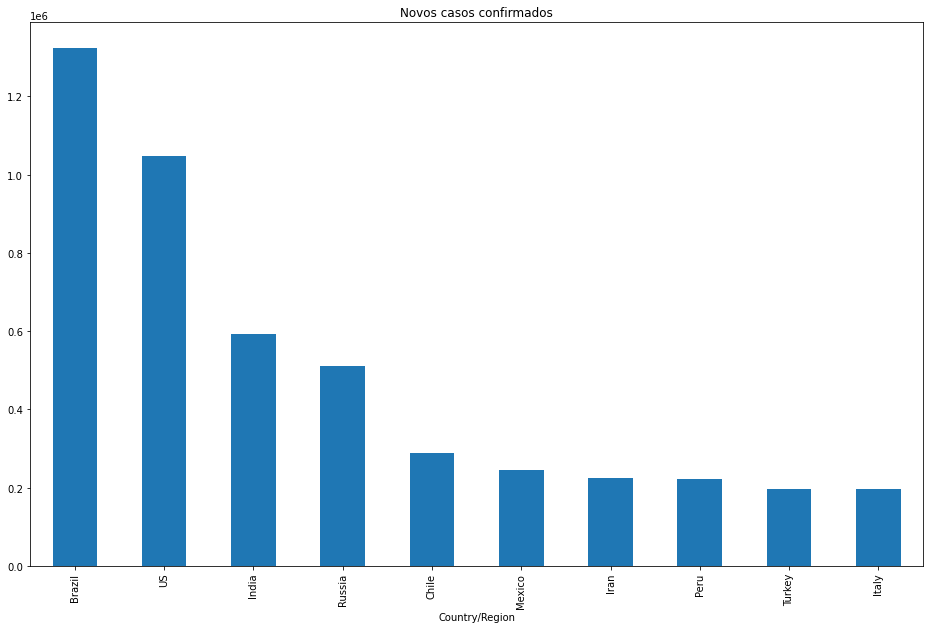

In [131]:
plt.figure(figsize=(16,10))
confirmed_bt_country['7/14/20'].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Novos casos confirmados')

Lembrado que existe um vicio aqui pois paises que não testaram individuos
podem sim ter casos ocorrendo mas não confirmados ainda.

# Utilizando outros dados

## Pesquise sobre boletins epidemiológicos no ministério da saúde.
* CDC - Estados Unidos também
* kaggle coronavírus

In [156]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:,-1]

In [160]:
information = [latest_by_country(deaths),latest_by_country(recovered),latest_by_country(confirmed)]
combined = pd.concat(information,axis=1)
combined.columns = ['deaths','confirmed','recorvered']
combined.head()

,deaths,confirmed,recorvered
Country/Region,,,
Afghanistan,1048,21454,34740
Albania,97,2062,3667
Algeria,1028,14295,20216
Andorra,52,803,861
Angola,26,118,541


In [161]:
sum_up =combined.sum()
letality_rate_1 = sum_up['deaths']/sum_up['recorvered']
print(letality_rate_1*100)

4.342903119518626


Pode variar esse resultado em muitos fatores.

# Letalitade por país

In [166]:
letality = (combined['deaths']/combined['recorvered'])*100
combined['letality_rate_1'] = letality
combined

,deaths,confirmed,recorvered,letality_rate_1
Country/Region,,,,
Afghanistan,1048,21454,34740,3.016695
Albania,97,2062,3667,2.645214
Algeria,1028,14295,20216,5.085081
Andorra,52,803,861,6.039489
Angola,26,118,541,4.805915
...,...,...,...,...
West Bank and Gaza,44,1084,6764,0.650503
Western Sahara,1,8,10,10.000000
Yemen,429,685,1516,28.298153


In [167]:
letality_rate_2 = (combined['deaths'] / (combined['deaths']+combined['recorvered']))*100
combined['letality_rate_2'] = letality_rate_2
combined.head()

,deaths,confirmed,recorvered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,1048,21454,34740,3.016695,2.928356
Albania,97,2062,3667,2.645214,2.577046
Algeria,1028,14295,20216,5.085081,4.839013
Andorra,52,803,861,6.039489,5.695509
Angola,26,118,541,4.805915,4.585538


In [169]:
combined.sort_values('letality_rate_1',ascending=False).head(10)

,deaths,confirmed,recorvered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,429,685,1516,28.298153,22.056555
MS Zaandam,2,0,9,22.222222,18.181818
Belgium,9787,17223,62781,15.589111,13.486661
United Kingdom,45053,1385,292931,15.380072,13.329921
Italy,34984,195441,243344,14.376356,12.569343
France,30032,78722,209640,14.325510,12.530458
Hungary,595,3106,4258,13.973697,12.260457
Netherlands,6154,193,51362,11.981621,10.699631
Mexico,36327,245830,311486,11.662482,10.444405


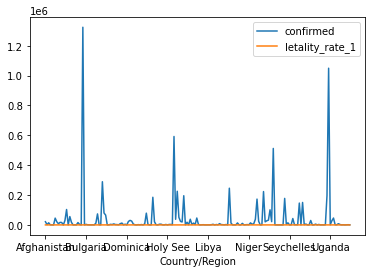

In [172]:
# Vizuliaçao horrenda
combined[['confirmed','letality_rate_1']].plot()

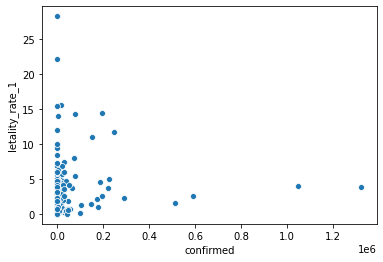

In [174]:
sns.scatterplot(data=combined,x='confirmed',y='letality_rate_1')

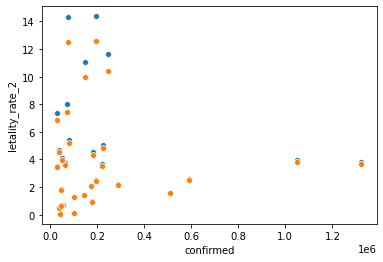

In [186]:
sns.scatterplot(data=combined.query('confirmed>30000'),x='confirmed',y='letality_rate_1')
sns.scatterplot(data=combined.query('confirmed>30000'),x='confirmed',y='letality_rate_2')

Hoje está se aproximando, pois o curso foi feito em fevereiro.

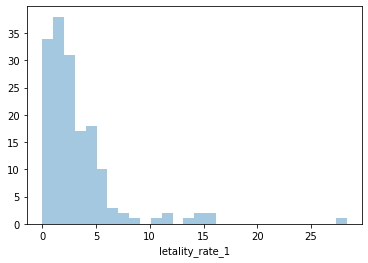

In [195]:
sns.distplot(combined.query('confirmed>100')['letality_rate_1'],kde=False)

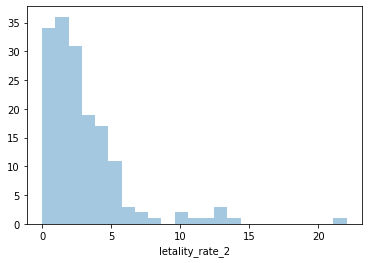

In [196]:
sns.distplot(combined.query('confirmed>100')['letality_rate_2'],kde=False)

In [199]:
combined.query('confirmed>10000')['letality_rate_2'].sort_values(ascending=False)

Country/Region
Belgium                 13.486661
Italy                   12.569343
France                  12.530458
Mexico                  10.444405
Spain                    9.967091
Canada                   7.420613
Ecuador                  6.867470
Ireland                  6.368544
Switzerland              5.625429
Romania                  5.436986
China                    5.165354
Algeria                  4.839013
Iran                     4.797301
Egypt                    4.557757
Indonesia                4.508884
Denmark                  4.397347
Germany                  4.332471
Japan                    4.201358
Poland                   3.965539
Iraq                     3.930577
US                       3.824677
Brazil                   3.704877
Colombia                 3.615429
Bolivia                  3.597081
Austria                  3.593512
Peru                     3.533413
Portugal                 3.423716
Moldova                  3.216618
Afghanistan              2.928356

### Crued Fatality rate

In [204]:
def latest_by_country_at(data,date):
    return data.groupby('Country/Region').sum()[date]

In [208]:
information = [latest_by_country_at(deaths,'5/5/20'),latest_by_country_at(recovered,'5/5/20'),latest_by_country_at(confirmed,'5/5/20')]
combined_5_5_20= pd.concat(information,axis=1)
combined_5_5_20.columns = ['deaths','confirmed','recorvered']
combined_5_5_20

,deaths,confirmed,recorvered
Country/Region,,,
Afghanistan,95,421,3224
Albania,31,570,820
Algeria,470,2067,4838
Andorra,46,514,751
Angola,2,11,36
...,...,...,...
West Bank and Gaza,2,127,371
Western Sahara,0,5,6
Yemen,4,1,22


6.875406002338573
643.3103984828962


### Rate for recorvered

In [229]:
information = [latest_by_country_at(deaths,'5/17/20'),latest_by_country_at(recovered,'5/5/20'),latest_by_country_at(confirmed,'5/5/20')]
combined_5_5_20= pd.concat(information,axis=1)
combined_5_5_20.columns = ['deaths','recovered','confirmed']
sum_up = combined_5_5_20.loc['Brazil']
letality_rate_1 = sum_up['deaths']/sum_up['confirmed']
print(letality_rate_1*100)
display(sum_up)

13.960417478671344


deaths        16118
recovered     48221
confirmed    115455
Name: Brazil, dtype: int64

Esses dados são um resumo do momento.